In [2]:
import pandas as pd
import numpy as np

In [6]:
dataset = pd.read_csv('labeled_data.csv')

In [4]:
import os
os.getcwd()

'C:\\Users\\karthik'

In [5]:
os.chdir('C:\\Users\\karthik\\OneDrive\\Documents')

In [7]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [8]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [9]:
dataset.describe()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [10]:
dataset["labels"]= dataset["class"].map({0:"hate words",
                                       1:"offensive language",
                                       2:"no hate or offensive"})

In [11]:
data = dataset[["tweet","labels"]]

In [39]:
!pip install nltk

In [12]:
import re
import nltk
import string

In [13]:

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [14]:
stemmer = nltk.SnowballStemmer('english')

In [32]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize the stemmer and stopwords
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

def data_clean(text):
    # Convert text to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    
    # Remove square brackets and their contents
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    # Remove words containing digits
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Tokenize the text and remove stopwords
    text = [word for word in text.split() if word not in stopwords]
    text = " ".join(text)
    
    # Stem the text
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)
    
    return text


In [33]:
data['tweet'] = data['tweet'].apply(data_clean)

C:\Users\karthik\AppData\Local\Temp\ipykernel_27336\257193600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(data_clean)


In [51]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",no hate or offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [17]:
x = np.array(data["labels"])
y = np.array(data["labels"])


In [18]:
x

array(['no hate or offensive', 'offensive language', 'offensive language',
       ..., 'offensive language', 'offensive language',
       'no hate or offensive'], dtype=object)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [20]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [21]:
x

<24783x6 sparse matrix of type '<class 'numpy.int64'>'
	with 57892 stored elements in Compressed Sparse Row format>

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [23]:
x_train

<16604x6 sparse matrix of type '<class 'numpy.int64'>'
	with 38776 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dt.predict(x_test)


In [27]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 465,    0,    0],
       [   0, 1379,    0],
       [   0,    0, 6335]], dtype=int64)

In [28]:
import seaborn as sns
import matplotlib.pyplot as ply

%matplotlib inline

<Axes: >

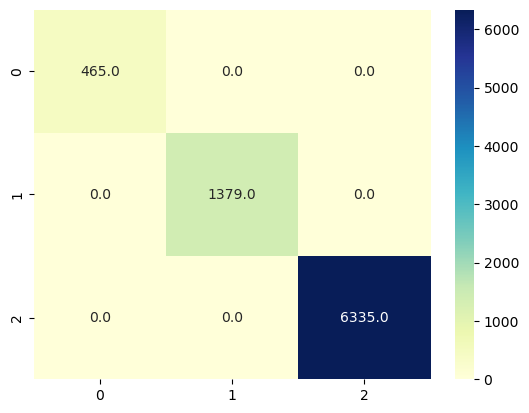

In [30]:
sns.heatmap(cm, annot=True, fmt=".1f", cmap="YlGnBu")


In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [34]:
sample = "lets go change the technology"
sample = data_clean(sample)